In [1]:
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import math
from typing import Dict, List
from torch.utils.data import Dataset, DataLoader
import random

In [12]:
def calculate_avg_mmr(elo_ratings):
    """
    Calculate the average value of 10 players' ELO ratings.
    Return -1 if the avg is out of bounds (0 - 3386)
    """
    ret = math.floor(sum(elo_ratings)/len(elo_ratings))
    if ret < 0 or ret > 3386:
        return -1
    
    return ret


def classify_elo(elo):
    """
    Return the index representing a ranking system in League of Legends.
    
    Iron IV, III, II, I = 0, 1, 2, 3
    Bronze IV, III, II, I = 4, 5, 6, 7
    Silver IV, III, II, I = 8, 9, 10, 11
    Gold IV, III, II, I = 12, 13, 14, 15
    Platinum IV, III, II, I = 16, 17, 18, 19
    Diamond IV, III, II, I = 20, 21, 22, 23
    Master = 24
    Grandmaster = 25
    Challengers = 26
    """
    if elo == -1:
        return -1 
    
    mmr_ranges = [
        [0, 112], [112, 227], [227, 479], [479, 579], # Iron
        [579, 757], [757, 963], [963, 1094], [1094, 1207], # Bronze
        [1207, 1308], [1308, 1418], [1418, 1528], [1528, 1619], # Silver
        [1619, 1702], [1702, 1793], [1793, 1896], [1896, 1980], # Gold
        [1980, 2045], [2045, 2146], [2146, 2255], [2255, 2329], # Platinum
        [2329, 2396], [2396, 2487], [2487, 2602], [2602, 2729], # Diamond
        [2729, 2893], # Master
        [2893, 3126], # Grandmaster 
        [3126, 3386] # Challenger
    ]
    for i in range(len(mmr_ranges)):
        if mmr_ranges[i][0] <= elo < mmr_ranges[i][1]:
            return i//4
    
    return -1 


def getDistribution():
    """
    # TODO: Add documentation
    """
    mmr = []
    elo = []
    failed = 0
    succeed = 0
    path = os.getcwd() + '\\\\DataCollection\\\\data\\\\data\\\\'
    matches = os.listdir(path)
    for file_name in matches:
        try:
            with open(path + file_name) as f:
                raw_data = json.load(f)
                if raw_data['timeline'] and raw_data['elo'] and len(raw_data['timeline']) >= 15:
                    avg_mmr = calculate_avg_mmr(raw_data['elo'])
                    target_elos = classify_elo(avg_mmr)
                    
                    mmr.append(avg_mmr)
                    elo.append(target_elos)
                    succeed += 1
        except:
            failed += 1

    print("Succeed: ",succeed)
    print("Failed: ", failed)
    return mmr, elo

In [13]:
mmr, elo = getDistribution()

Succeed:  8469
Failed:  1721


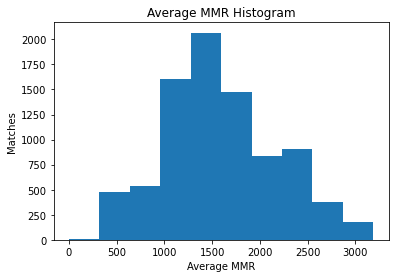

In [14]:
plt.title("Average MMR Histogram")
plt.hist(mmr)
plt.xlabel("Average MMR")
plt.ylabel("Matches")
plt.show()

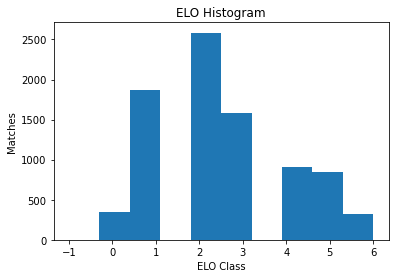

In [15]:
plt.title("ELO Histogram")
plt.hist(elo)
plt.xlabel("ELO Class")
plt.ylabel("Matches")
plt.show()